In [ ]:
###### Data Analysis - 
# Version 1
## 1/21/25
## 17:15

In [1]:
# Importing Modules
import sys
import os

# Add the root directory to sys.path
sys.path.append(os.path.abspath(".."))

# Now you can use absolute imports
from d497_helpers import folder_manager as fm, archive_module, checkpoint_helper as CheckPoint, database_helper as db_tool, config, import_dataframe

# Pandas
import pandas as pd

# Numpy
import numpy as np

# Seaborn
import seaborn as sns


In [2]:
import_cdc_data_main_csv, import_cdc_data_main_pickle = import_dataframe.import_dataframe("cdc_data", "cleaned", "cdc_data_main_df")

In [3]:
cdc_data_main_df = import_cdc_data_main_pickle.copy()

In [4]:
del import_cdc_data_main_csv
del import_cdc_data_main_pickle

In [5]:
cdc_data_main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187620 entries, 0 to 187619
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   year_code       187620 non-null  object
 1   month_code      187620 non-null  object
 2   state_fipcode   187620 non-null  object
 3   county_fipcode  187620 non-null  object
 4   fips_five       187620 non-null  object
 5   births          187620 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 8.6+ MB


In [6]:
cdc_data_main_df.head()

,year_code,month_code,state_fipcode,county_fipcode,fips_five,births
0,1995,1,01,C015,01015,464
1,1995,1,01,C073,01073,1119
2,1995,1,01,C089,01089,658
3,1995,1,01,C097,01097,845
4,1995,1,01,C101,01101,630


In [7]:
# Initializes Database Engine and Session For SQL
db_tool.initialize_engine()
db_tool.initialize_session()

In [8]:
pull_ufo_agg_data_sql_query = '''

    SELECT
        *
        FROM
            ufo_data_agg

'''

In [9]:
ufo_data_agg_df = db_tool.export_df_from_sql(pull_ufo_agg_data_sql_query, "ufo_data_agg")

2025-01-21 18:40:27,269 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-01-21 18:40:27,271 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("

    SELECT
        *
        FROM
            ufo_data_agg

")
2025-01-21 18:40:27,272 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-01-21 18:40:27,273 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("

    SELECT
        *
        FROM
            ufo_data_agg

")
2025-01-21 18:40:27,274 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-01-21 18:40:27,276 INFO sqlalchemy.engine.Engine 

    SELECT
        *
        FROM
            ufo_data_agg


2025-01-21 18:40:27,276 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-01-21 18:40:27,519 INFO sqlalchemy.engine.Engine COMMIT


In [10]:
ufo_data_agg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83730 entries, 0 to 83729
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   year_code       83730 non-null  int64 
 1   month_code      83730 non-null  int64 
 2   state_fipcode   83730 non-null  object
 3   county_fipcode  83730 non-null  object
 4   fips_five       83730 non-null  object
 5   sightings       83730 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 3.8+ MB


In [11]:
ufo_data_agg_df.head()

,year_code,month_code,state_fipcode,county_fipcode,fips_five,sightings
0,1994,1,06,C037,06037,4
1,1994,1,06,C053,06053,1
2,1994,1,06,C089,06089,1
3,1994,1,06,C111,06111,1
4,1994,1,08,C117,08117,1


In [12]:
cdc_data_main_df['year_code'] = cdc_data_main_df['year_code'].astype(int)
cdc_data_main_df['month_code'] = cdc_data_main_df['month_code'].astype(int)

In [13]:
cdc_data_main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187620 entries, 0 to 187619
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   year_code       187620 non-null  int64 
 1   month_code      187620 non-null  int64 
 2   state_fipcode   187620 non-null  object
 3   county_fipcode  187620 non-null  object
 4   fips_five       187620 non-null  object
 5   births          187620 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 8.6+ MB


In [17]:
merged_df = cdc_data_main_df.merge(ufo_data_agg_df, on=['year_code', 'month_code', 'state_fipcode', 'county_fipcode', 'fips_five'], how="inner")

In [18]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48015 entries, 0 to 48014
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   year_code       48015 non-null  int64 
 1   month_code      48015 non-null  int64 
 2   state_fipcode   48015 non-null  object
 3   county_fipcode  48015 non-null  object
 4   fips_five       48015 non-null  object
 5   births          48015 non-null  int64 
 6   sightings       48015 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 2.6+ MB


In [33]:
merged_df.sample(10)

,year_code,month_code,state_fipcode,county_fipcode,fips_five,births,sightings
15509,2008,9,13,C139,13139,506,1
24907,2013,4,06,C047,06047,353,1
6563,2002,12,06,C023,06023,148,1
41350,2020,4,48,C029,48029,2030,3
8328,2004,3,44,C003,44003,182,1
4629,2001,4,27,C053,27053,1647,1
9661,2005,2,36,C069,36069,144,1
31268,2015,8,08,C001,08001,679,3
39454,2019,8,42,C049,42049,322,1
25150,2013,5,25,C005,25005,503,1


In [19]:
correlation = merged_df[['births', 'sightings']].corr()

In [20]:
print(correlation)

             births  sightings
births     1.000000   0.439387
sightings  0.439387   1.000000


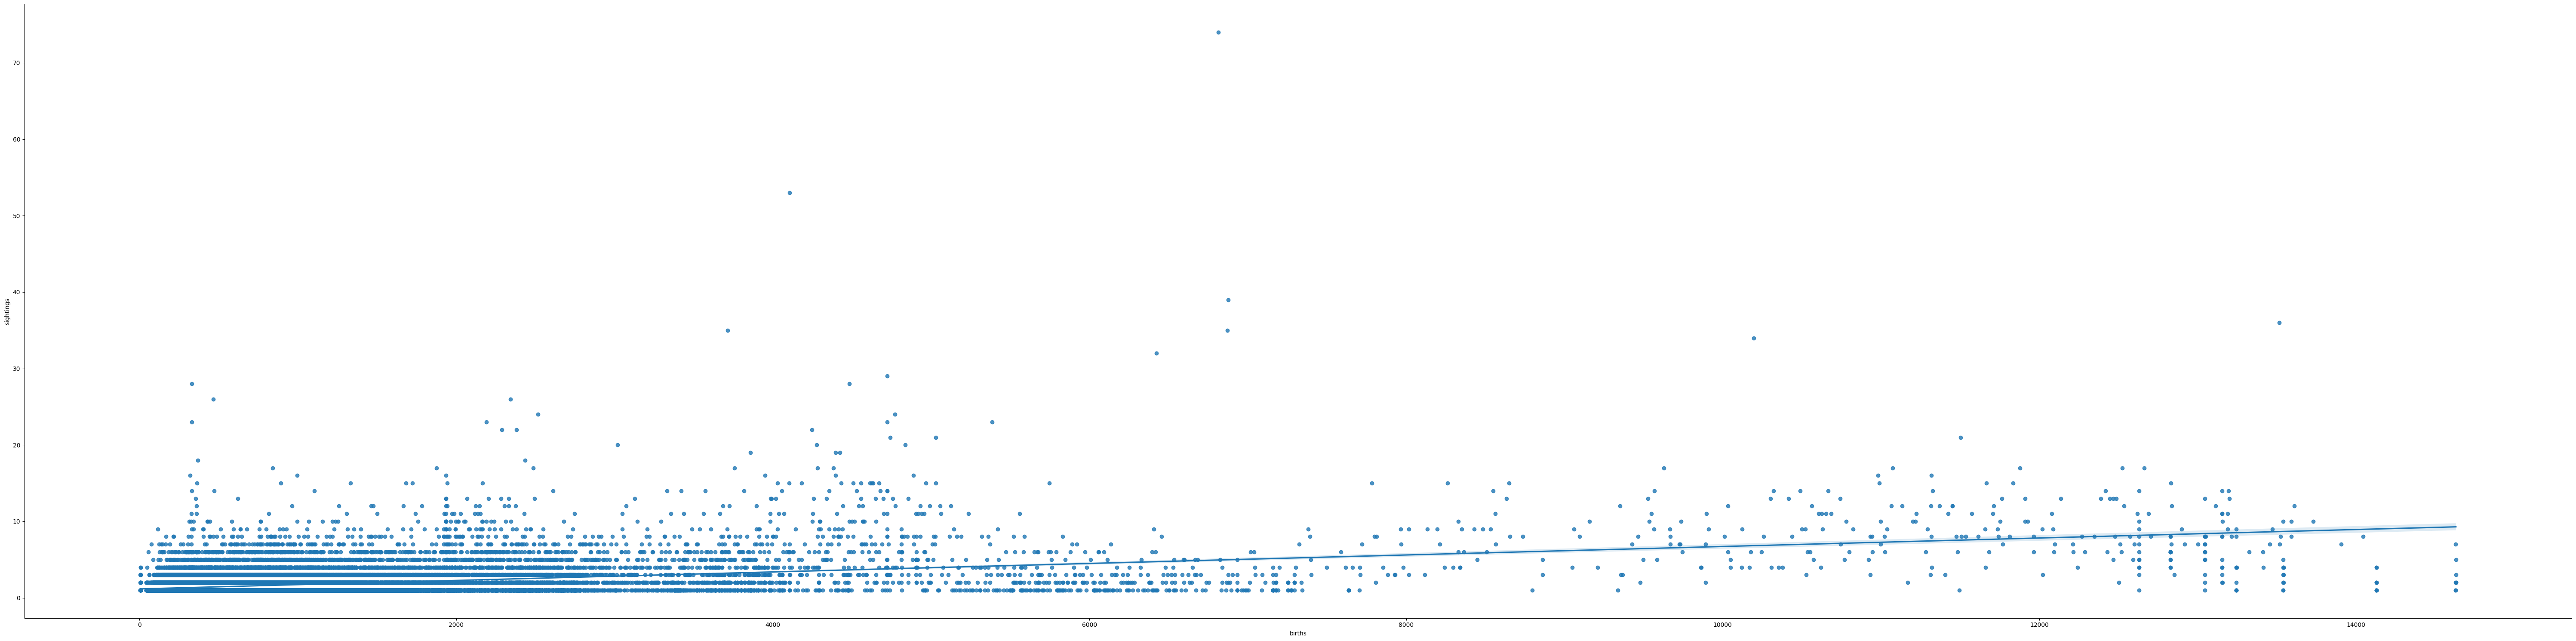

In [39]:
sns.lmplot(data=merged_df, x='births', y='sightings', height=15, aspect=4)

In [42]:
merged_df_subset = merged_df.drop(columns=['county_fipcode'])

In [43]:
spearman_correlation = merged_df_subset.corr(method='spearman')

In [45]:
spearman_correlation

,year_code,month_code,state_fipcode,fips_five,births,sightings
year_code,1.000000,-0.025134,0.018880,0.019084,-0.147698,0.055536
month_code,-0.025134,1.000000,0.014449,0.014216,0.004247,0.041708
state_fipcode,0.018880,0.014449,1.000000,0.998409,-0.076542,-0.099840
fips_five,0.019084,0.014216,0.998409,1.000000,-0.079435,-0.102069
births,-0.147698,0.004247,-0.076542,-0.079435,1.000000,0.287892
sightings,0.055536,0.041708,-0.099840,-0.102069,0.287892,1.000000


### Make a combination dataframe for all possible dates and states. 

In [11]:
get_fips_data_sql_query = """

    SELECT 
        state_fipcode,
        county_fipcode,
        fips_five
    FROM
        fips_data
            WHERE multi_county_flag == "0"
"""

In [13]:
fips_results = db_tool.execute_query(get_fips_data_sql_query)

2025-01-14 16:21:22,507 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-01-14 16:21:22,508 INFO sqlalchemy.engine.Engine 

    SELECT 
        state_fipcode,
        county_fipcode,
        fips_five
    FROM
        fips_data

2025-01-14 16:21:22,509 INFO sqlalchemy.engine.Engine [cached since 172.7s ago] ()
2025-01-14 16:21:22,566 INFO sqlalchemy.engine.Engine COMMIT


In [16]:
fips_data = pd.DataFrame.from_records(fips_results)

In [18]:
fips_data.columns = ['state_fipcode', 'county_fipcode', 'fips_five']

In [20]:
fips_data.sample()

,state_fipcode,county_fipcode,fips_five
18449,29,C005,29005


In [22]:
fips_five_list = fips_data['fips_five'].unique()

In [23]:
fips_five_list

array(['01001', '01003', '01005', ..., '56041', '56043', '56045'],
      shape=(3145,), dtype=object)

In [89]:
# Define the range of years and months
years = list(range(1995, 2024)) # 1994 to 2023 inclusive
months = list(range(1, 13))      # 1 to 12 inclusive

In [90]:
all_combinations = pd.DataFrame(
    itertools.product(years, months, fips_five_list),
    columns=['year_code', 'month_code', 'fips_five']
)


In [91]:
all_combinations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094460 entries, 0 to 1094459
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   year_code   1094460 non-null  int64 
 1   month_code  1094460 non-null  int64 
 2   fips_five   1094460 non-null  object
dtypes: int64(2), object(1)
memory usage: 25.1+ MB


In [92]:
all_combinations.head(25)

,year_code,month_code,fips_five
0,1995,1,01001
1,1995,1,01003
2,1995,1,01005
3,1995,1,01007
4,1995,1,01009
5,1995,1,01011
6,1995,1,01013
7,1995,1,01015
8,1995,1,01017
9,1995,1,01019
